## Return Periods
Return Periods are located in the \input\*MyProject*\returnPeriods directory. They are provided as CSV files with the following format:

    - The first row of the CSV file contains the column names.
    - The first column should be named "time_yr" and contains time in number of years as an integer.
    - The other columns should contain the expected number of events. The column names correspond to the return period names and must match the names used in the network.xlsx file.
    - Multiple CSV files can be provided in the same directory, allowing users to describe return periods with different time ranges and step sizes.
    - By default a polynomial interpolation is used for the return periods.

Return periods are stored in the network object under the network.returnPeriods attribute.

Network for study case <1-HV-urban--0-sw> initialized.

Simulation:	Start =   1; Stop =  51; Duration =  50 timesteps.
Hazard:		Start =   3; Stop =   8; Duration =   5 timesteps.


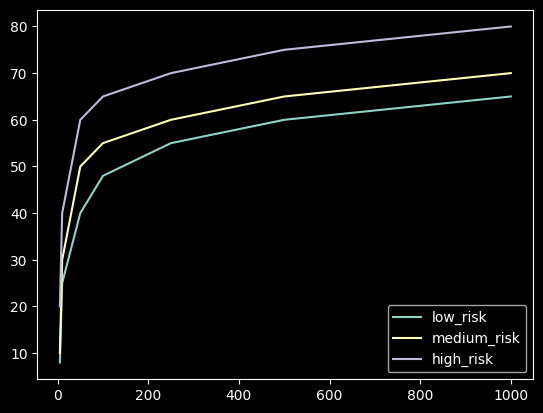

In [1]:
import reXplan as rx
import seaborn as sns

rx.config.path.SetWorkspaceFolder('Examples')
simulationName = '1-HV-urban--0-sw'
network = rx.network.Network(simulationName)
simulation = rx.simulation.Sim(simulationName)

for rp in network.returnPeriods.keys():
    sns.lineplot(x=network.returnPeriods[rp].x_data, y=network.returnPeriods[rp].y_data, label=network.returnPeriods[rp].name)

simulation.initialize_model_rp() generates simulation samples (also called iterations) based on the provided return periods. 

Each iteration will correspond to one specific reference intesity. The reference intensity refers to the reference return period. Meaning that elements with an associated return period that is less severe that the reference return period will observe lower intensities while elements with an associated return period that is more severe that the reference return period will observe higher intensities.

The reference intensities are selected based on a stratification method using the R librairy SamplingStrata. It is possible to avoid the stratification by setting the optional parameter maxStrata to 1.

The number of iterations taken from each stratum is equal to the calculated minimum population selected for that stratum to reach the maximum permissable error "cv" multiplied by the provided mc_iteration_factor. 

In [2]:
simulation.initialize_model_rp(
                    network = network,
                    ref_return_period = "high_risk",
                    mc_iteration_factor = 2)


Strata  3
Sample size  193
Strata  4
Sample size  155
Strata  5
Sample size  30
Strata  6
Sample size  30
Strata  7
Sample size  29
Strata  8
Sample size  20
-----------------
 Kmeans solution 
-----------------
 *** Domain:  1  ***
 Number of strata:  8
 Sample size     :  20
Computations are being done on population data

Number of strata:  8
... of which with only one unit:  0
Input data have been checked and are compliant with requirements

 *** Domain :  1   1
 Number of strata :  10000
 *** Sample cost:  15.54284
 *** Number of strata:  7
 *** Sample size :  16
 *** Number of strata :  7
---------------------------------------------------------------------------------------------
Strata: 0
Number of samples: 4
Hazard intensity range: 19.315312186512983 - 48.40113588071654
Strata: 1
Number of samples: 4
Hazard intensity range: 48.406472300062276 - 58.97610620241599
Strata: 2
Number of samples: 4
Hazard intensity range: 58.98188639847041 - 65.79140920336991
Strata: 3
Number of sam

The results of the stratification can be accessed through the simulation attribute simulation.stratResults.
The Allocation corresponds to the number of samples to be selected from each stratum (this will finally be multiplied by mc_iteration_factor)

In [3]:
simulation.stratResults

,Domain,Stratum,Population,Allocation,SamplingRate,Lower_X1,Upper_X1
1,1.0,1,6899.0,2.0,0.000290,19.315312,48.401136
2,1.0,2,1920.0,2.0,0.001042,48.406472,58.976106
3,1.0,3,833.0,2.0,0.002678,58.981886,65.791409
4,1.0,4,113.0,2.0,0.018001,65.806830,67.877743
5,1.0,5,123.0,2.0,0.016260,67.900126,71.591839
6,1.0,6,78.0,3.0,0.035227,71.633896,76.241110
7,1.0,7,34.0,3.0,0.074411,76.329773,80.235174


The stratification results can also be plotted into a bar diagram showing the distribution of reference intensity samples and the calculated strata borders with red vertical lines.

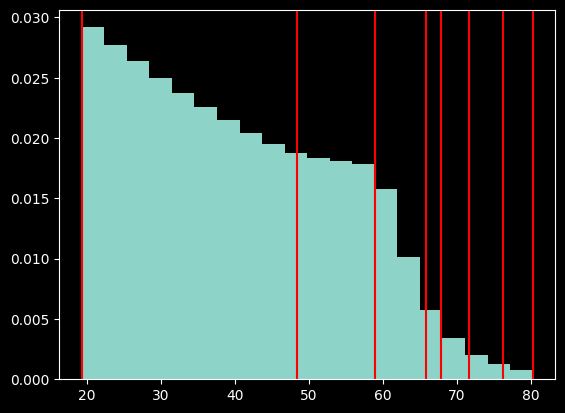

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(simulation.samples, density=True, bins=20)
for b in np.append(simulation.stratResults["Upper_X1"].values, simulation.stratResults["Lower_X1"].values[0]):
    plt.axvline(x = b, color = 'r')

The Failure probabilites of each element is troed in simulation.failureProbs and results directly from the provided fragility curves and return periods

<AxesSubplot: xlabel='event intensity', ylabel='failure probability'>

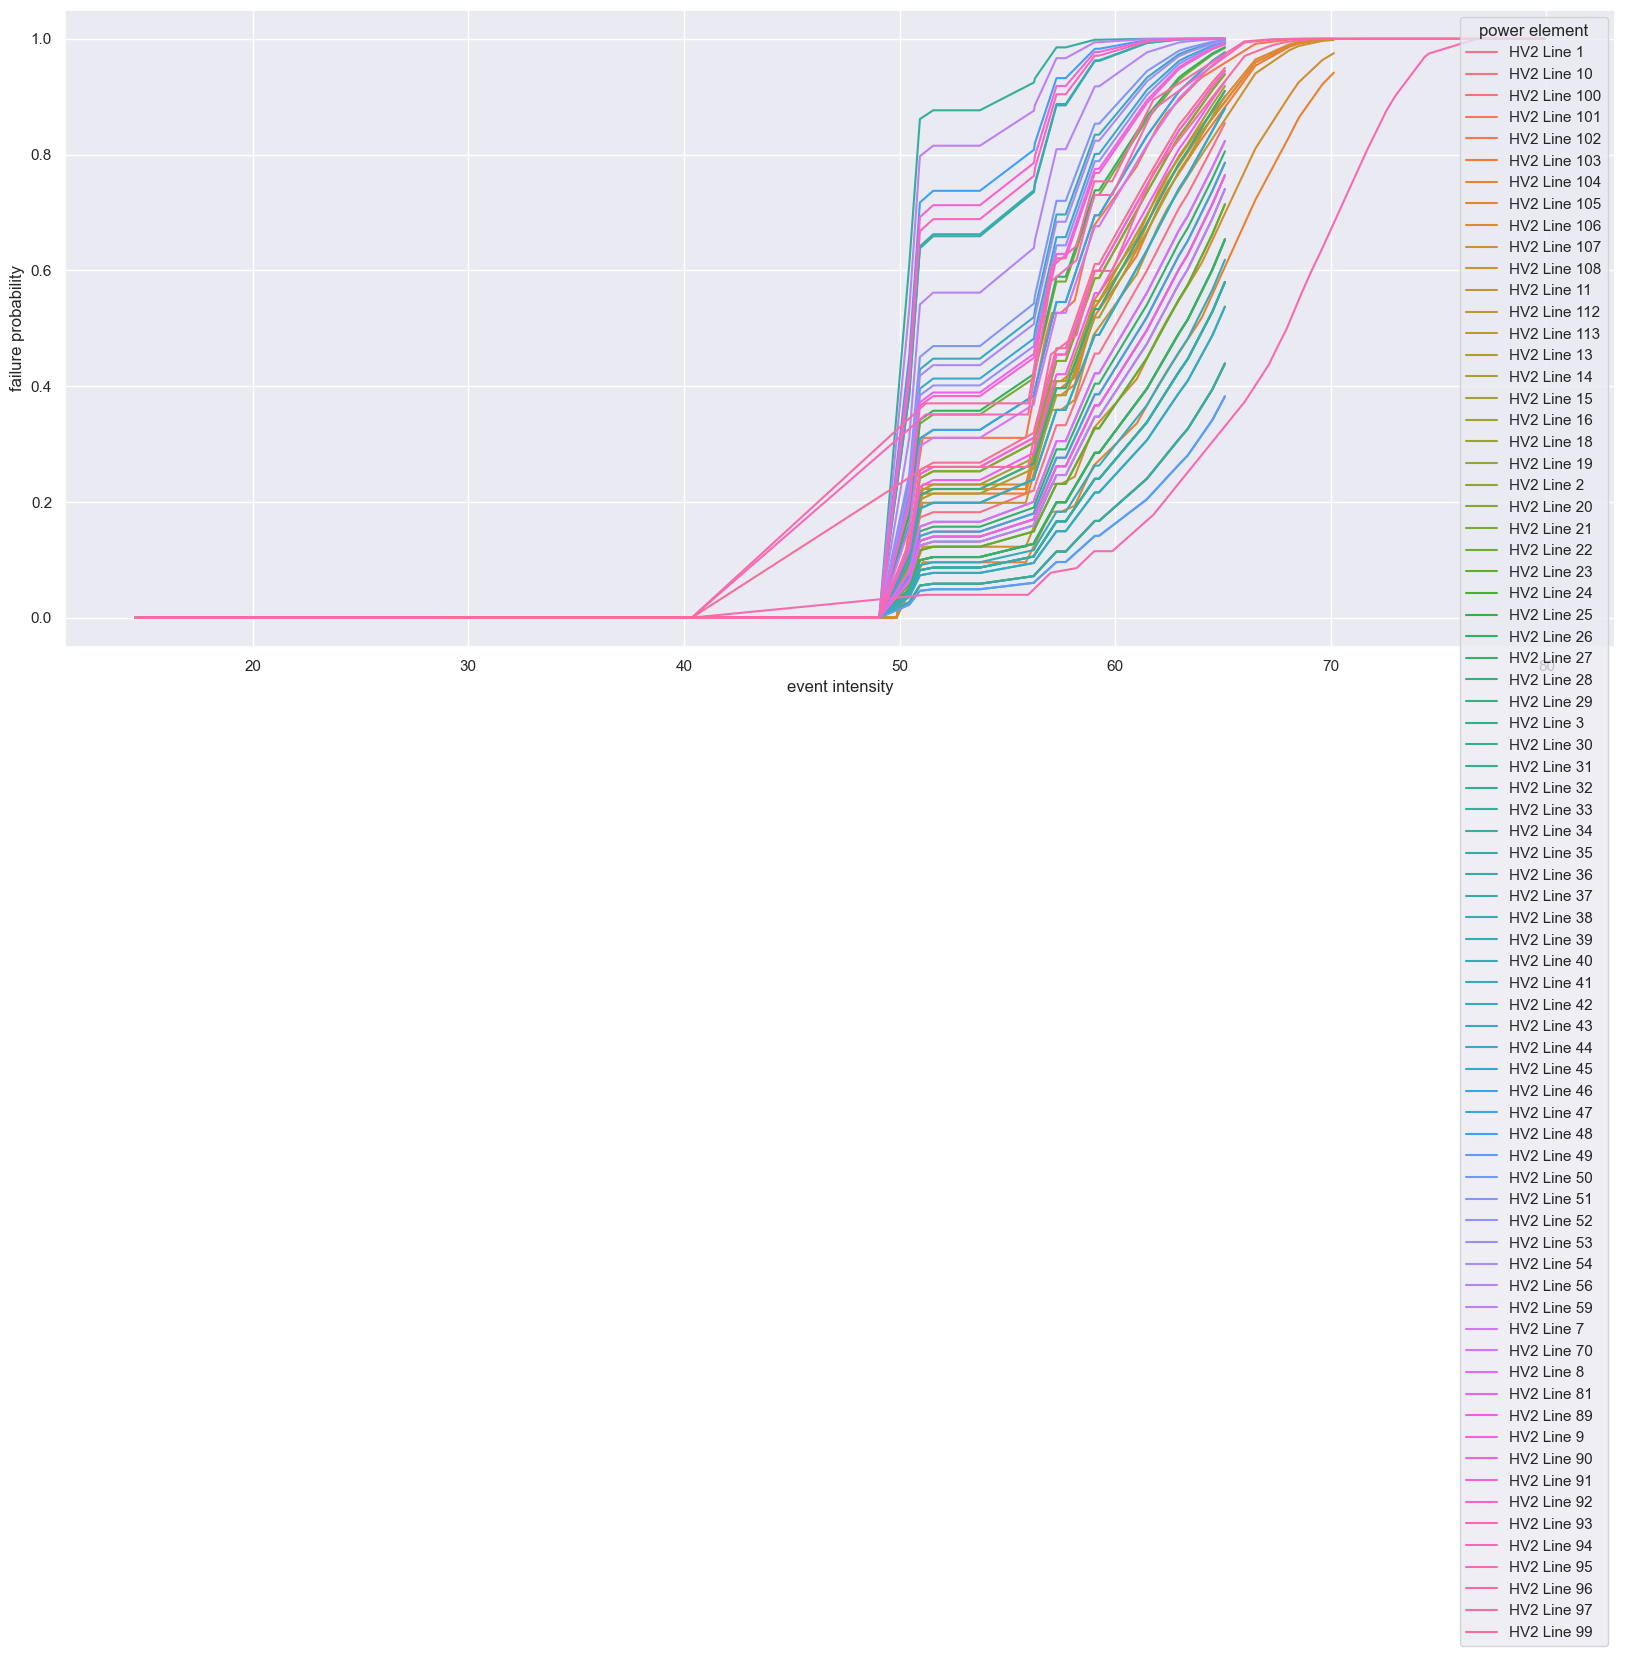

In [8]:
sns.set("notebook", rc={"figure.figsize": (20, 8.27)})
df = simulation.failureProbs[simulation.failureProbs['element type']=='Line']
df = df.dropna(subset=['failure probability'])
df['event intensity'] = df['event intensity'].apply(lambda x: x.item() if isinstance(x, np.ndarray) else x)
sns.lineplot(data=df, x='event intensity', y='failure probability', hue='power element')

The probability of failures can be accessed for specific elements and iterations

In [13]:
simulation.failureProbs[(simulation.failureProbs['element type']=='Line') & (simulation.failureProbs['iteration']==20)]

,iteration,strata,event intensity,element type,power element,failure probability,status
12635,20,4,52.494258,Line,HV2 Line 1,0.182093,NaN
12636,20,4,52.494258,Line,HV2 Line 10,0.148542,NaN
12637,20,4,52.494258,Line,HV2 Line 100,0.260300,NaN
12638,20,4,58.122019,Line,HV2 Line 101,0.415042,NaN
12639,20,4,58.122019,Line,HV2 Line 102,0.547785,NaN
12640,20,4,58.122019,Line,HV2 Line 103,0.402359,NaN
12641,20,4,58.122019,Line,HV2 Line 104,0.193044,NaN
12642,20,4,58.122019,Line,HV2 Line 105,0.427454,NaN
12643,20,4,58.122019,Line,HV2 Line 106,0.415042,NaN
12644,20,4,58.122019,Line,HV2 Line 107,0.243333,NaN
